<a href="https://colab.research.google.com/github/Alexis-CAPON/cse437-reinforcement-learning/blob/main/lab1_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [2]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0 # @param {"type":"integer"}

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

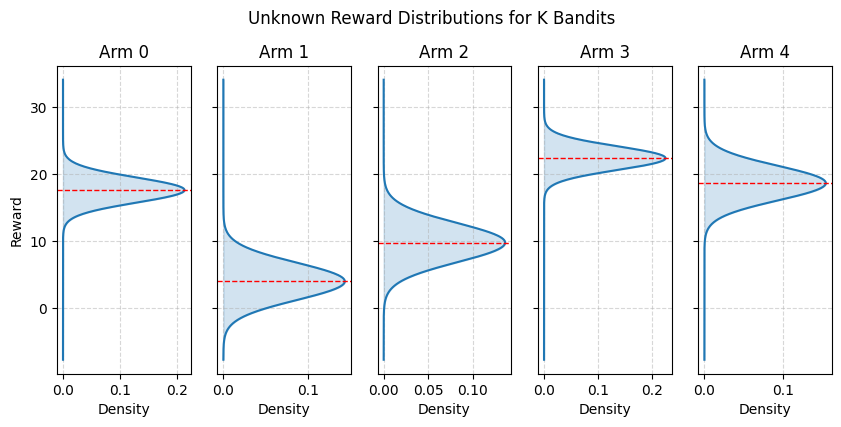

In [4]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

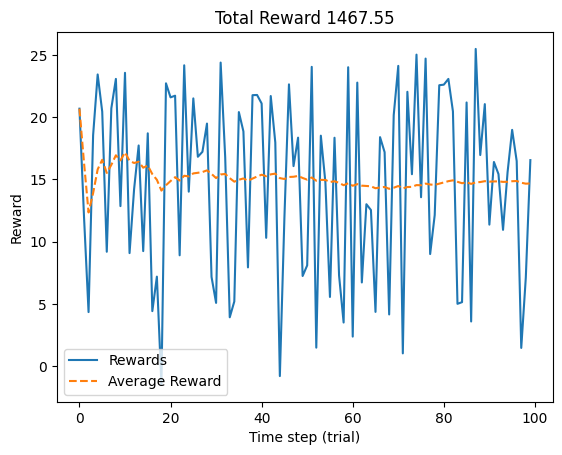

In [5]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

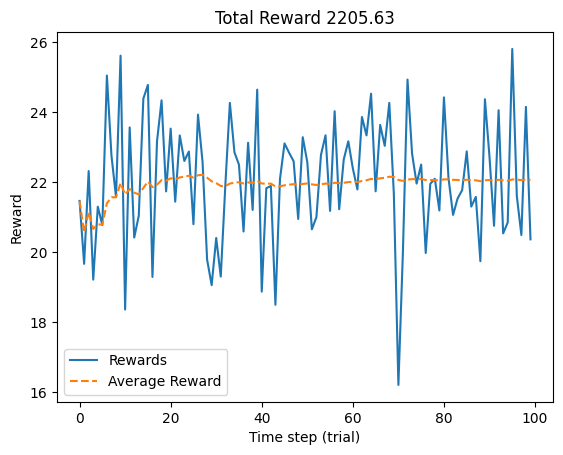

In [6]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: We picked up the arm 3 based on the previous result
  a = 3

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Exploration:  10
Max 90


Text(0, 0.5, 'Reward')

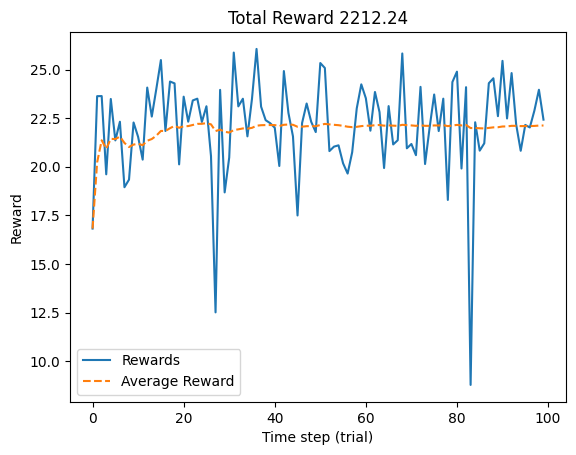

In [7]:
rewards = []
ArmAverageRewards = [0.0] * K
arm_counts = [0] * K
epsilon = 0.1
numberExploration = 0
numberChooseMax = 0

# For T trials
for t in range(T):
    # Epsilon-greedy policy
    if np.random.random() > epsilon:
        # Choose the arm with the highest estimated average reward (exploitation)
        a = np.argmax(ArmAverageRewards)
        numberChooseMax += 1
    else:
        # Choose a random arm (exploration)
        a = np.random.randint(0, K)
        numberExploration += 1

    # Get reward for chosen arm
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimated average reward for the chosen arm
    arm_counts[a] += 1
    ArmAverageRewards[a] = ArmAverageRewards[a] + (r - ArmAverageRewards[a]) / arm_counts[a]


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
print('Exploration: ', numberExploration)
print('Max', numberChooseMax)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f" % total)
xlabel("Time step (trial)")
ylabel("Reward")

True Best Arm: 3 (Mean: 22.41)

--- Final Results ---
Arm 0: Pulled 1 times. Estimated Mean: 3.98 (True Mean: 17.64)
Arm 1: Pulled 1 times. Estimated Mean: 0.17 (True Mean: 4.00)
Arm 2: Pulled 1 times. Estimated Mean: 1.49 (True Mean: 9.79)
Arm 3: Pulled 96 times. Estimated Mean: 21.63 (True Mean: 22.41)
Arm 4: Pulled 1 times. Estimated Mean: 2.71 (True Mean: 18.68)


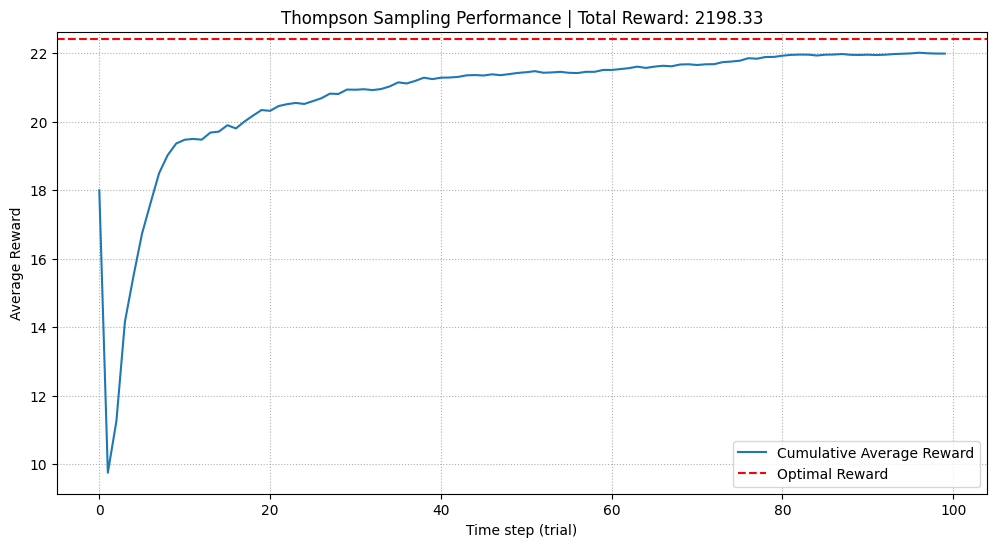

In [39]:
#Thompson sampling

'''
Ok so for thompson sampling, the idea is to create for each an estimate of its probability distribution
Then we go greedy by picking up the arm with the highest value that we will have from our draw
Then we update our distributions
Finally repeat
'''
rewards = []
sum_of_rewards = [0] * K
numberExploration = 0
numberChooseMax = 0

# Precision of the true reward distribution for each arm
bandit_precision = 1 / (bandit_std ** 2)
true_best_arm = np.argmax(bandit_mean)



# as we used a normal distribution, we can pick up the mean as the criteria of selection
estimated_means = np.full(K, 0.0)

# the precision (1/variance) of our belief. Start with low precision (high uncertainty).
lambdas = np.full(K, 1.0)

arm_pulls = np.zeros(K)

# We pull each arm once to get initiated

for i in range(K):
    r = np.random.normal(bandit_mean[i], bandit_std[i])
    rewards.append(r)

    lambdas[i] += bandit_precision[i]

    sum_of_rewards[i] += r

    estimated_means[i] = ( bandit_precision[i] * sum_of_rewards[i]) / lambdas[i]
    arm_pulls[i] += 1

# For T trials
for t in range(T-K):
    # We need to sample

    sampled_means = [
        np.random.normal(loc=mu, scale=1/np.sqrt(lam))
        for mu, lam in zip(estimated_means, lambdas)
    ]

    # Choose the arm with the highest sampled_mean
    a = np.argmax(sampled_means)


    # Get reward for chosen arm
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    lambdas[a] += bandit_precision[a]

    sum_of_rewards[a] += r

    estimated_means[a] = (bandit_precision[a] * sum_of_rewards[a]) / lambdas[a]

    arm_pulls[a] += 1


total_reward = sum(rewards)
avg_reward_per_trial = np.cumsum(rewards) / np.arange(1, T + 1)

print(f"True Best Arm: {true_best_arm} (Mean: {bandit_mean[true_best_arm]:.2f})\n")
print("--- Final Results ---")
for i in range(K):
    print(f"Arm {i}: Pulled {int(arm_pulls[i])} times. Estimated Mean: {estimated_means[i]:.2f} (True Mean: {bandit_mean[i]:.2f})")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(avg_reward_per_trial, label='Cumulative Average Reward')
plt.axhline(y=max(bandit_mean), color='r', linestyle='--', label='Optimal Reward')
plt.title(f"Thompson Sampling Performance | Total Reward: {total_reward:.2f}")
plt.xlabel("Time step (trial)")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. Choosing ε=0.1 is better than ε=0.001. It allow more exploration and so we won't miss an opportunity if we randomly choose the arm that don't have the "highest" reward distribution.



2. As the greedy strategy is based on creating an estimation of the reward distribution of each arms, if we make slight and smooth change over time, this will affect the strategy overall on the long term. We might need have to make the epsilon movable for more or less exploration overtime to adapt thoose changes.

3. In the long run, having a epislon not too low alloww the model to find opportunities and not to go focus on a single path as the algorithm is build. Having a epsilon higher, will make the algorithm explore more and vice-versa. We need to find a great balance.

4. If we increase significantly the number of arms, this strategy will be affected a lot. As we explore randomly and select randomly our first arm, it will be really hard to pick up THE good arm.